#### Data Description:  
Amazon Reviews data (data source) The repository has several datasets. For this case study, we are using the Electronics dataset. 
Domain: 
E-commerce 
#### Context: 
Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time. 
Attribute Information: ● userId  : Every user identified with a unique id ● productId : Every product identified with a unique id ● Rating  : Rating of the corresponding product by the corresponding user  ● timestamp : Time of the rating ( ignore this column for this exercise

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load Dataset and add headers

In [2]:
# Import the dataset and give the column names
columns=['userId', 'productId', 'ratings','timestamp']
electronics_df= pd.read_csv('ratings_Electronics.csv',names=columns)

In [3]:
print(electronics_df.columns)
print(electronics_df.shape)

Index(['userId', 'productId', 'ratings', 'timestamp'], dtype='object')
(7824482, 4)


In [4]:
electronics_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
#Check the datatypes
electronics_df.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [7]:
#Five point summary 
electronics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [8]:
#Five point summary w.r.t to ratings
electronics_df.describe()['ratings'].T

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

#### mean rating is > 4, 75 percentile user rated 5(max)

In [9]:
#show minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_df.ratings.min()))
print('Maximum rating is: %d' %(electronics_df.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


In [10]:
#Handle missing values
print('Number of missing values across columns: \n',electronics_df.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
ratings      0
timestamp    0
dtype: int64


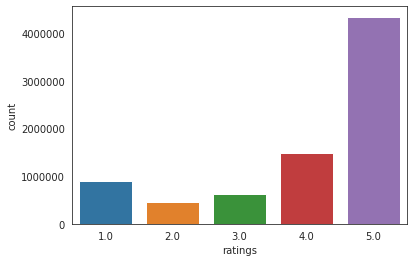

In [11]:
# Show the distribution of the rating using Histogram
with sns.axes_style('white'):
    rating_plot = sns.countplot(x= "ratings", data=electronics_df)

#### More no. of people has given 5 Ratings.

In [12]:
## User and Product details
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_df.shape[0])
print("Total No of Users   :", len(np.unique(electronics_df.userId)))
print("Total No of products  :", len(np.unique(electronics_df.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users   : 4201696
Total No of products  : 476002


In [13]:
#Drop Timestamp column as it is immaterial feature
electronics_df.drop(['timestamp'], axis=1,inplace=True)

#### Take a subset of the dataset to make it less sparse/ denser

In [14]:
#Getting the new dataframe which contains users who has given 50 or more ratings
electronics_df_final = electronics_df.groupby("productId").filter(lambda x:x['ratings'].count() >=50)

In [15]:
electronics_df_final.shape

(5374313, 3)

In [16]:
electronics_df_final.head(20)

,userId,productId,ratings
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
188,AOZZ0CTG5RMW1,0972683275,4.0
189,A2IDCSC6NVONIZ,0972683275,5.0
190,AML8NIWFKHZJU,0972683275,3.0
191,A33HBPL7Q6SZMG,0972683275,5.0
192,A22JDDJB1ZLGGZ,0972683275,5.0


#### Split the data randomly into train and test dataset

In [17]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(electronics_df_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
154602,A15BHBF0L0HV1F,B000067RVL,5.0
3405827,A3VVJIZXLL1QFP,B003KPBRRW,5.0
1168365,AFHY3XJJ6NCAI,B000MM3EKY,5.0
2673404,A2WPY1SNQPCC00,B002L0VNXK,5.0
2175241,AJMJREC90WJVP,B001NJTZUS,4.0


In [18]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (3762019, 3)
Shape of testing data:  (1612294, 3)


### Build Popularity Recommender model

In [19]:
#Average rating of the product 
train_data.groupby('productId')['ratings'].mean().head()

productId
0972683275    4.473541
1400501466    3.606742
1400501520    4.296296
1400501776    3.784946
1400532620    3.666667
Name: ratings, dtype: float64

In [20]:
train_data.groupby('productId')['ratings'].mean().sort_values(ascending = False).head()

productId
B003RCI4OW    5.000000
B000TMFYBO    4.979167
B002A6G3V2    4.976190
B000053HC5    4.976000
B00432GS0W    4.968750
Name: ratings, dtype: float64

In [21]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productId')['ratings'].mean()) 

In [22]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productId')['ratings'].count())  

In [23]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0972683275,4.473541,737
1400501466,3.606742,178
1400501520,4.296296,54
1400501776,3.784946,93
1400532620,3.666667,117


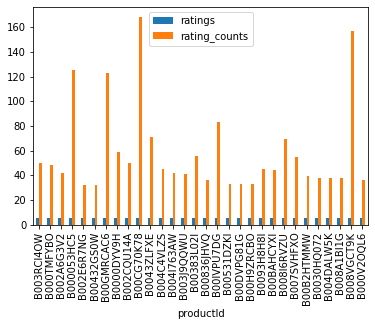

In [24]:
most_popular_products = ratings_mean_count.sort_values(['ratings', 'rating_counts'], ascending = [0,1])
most_popular_products.head(30).plot(kind = "bar")

In [25]:
most_popular_products.head(30)

,ratings,rating_counts
productId,,
B003RCI4OW,5.000000,50
B000TMFYBO,4.979167,48
B002A6G3V2,4.976190,42
B000053HC5,4.976000,125
B002E6R7NG,4.968750,32
B00432GS0W,4.968750,32
B00GMRCAC6,4.967480,123
B0000DYV9H,4.966102,59
B002CQU14A,4.960000,50


In [26]:
#Generate a recommendation rank based upon score 
most_popular_products['Rank'] = most_popular_products['rating_counts'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = most_popular_products.head(5) 
popularity_recommendations 

,ratings,rating_counts,Rank
productId,,,
B003RCI4OW,5.000000,50,18333.0
B000TMFYBO,4.979167,48,19058.0
B002A6G3V2,4.976190,42,21636.0
B000053HC5,4.976000,125,6973.0
B002E6R7NG,4.968750,32,25881.0


In [27]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [28]:
find_recom = [15,121,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

            userID   ratings  rating_counts     Rank
productId                                           
B003RCI4OW      15  5.000000             50  18333.0
B000TMFYBO      15  4.979167             48  19058.0
B002A6G3V2      15  4.976190             42  21636.0
B000053HC5      15  4.976000            125   6973.0
B002E6R7NG      15  4.968750             32  25881.0


Here is the recommendation for the userId: 121

            userID   ratings  rating_counts     Rank
productId                                           
B003RCI4OW     121  5.000000             50  18333.0
B000TMFYBO     121  4.979167             48  19058.0
B002A6G3V2     121  4.976190             42  21636.0
B000053HC5     121  4.976000            125   6973.0
B002E6R7NG     121  4.968750             32  25881.0


Here is the recommendation for the userId: 53

            userID   ratings  rating_counts     Rank
productId                                           
B003RC

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####  Build Collaborative Filtering model

CF recommends an item to a user if her/his neighbors (other users similar to her/him) are interested in such item.  Note  that  user’s  rating  on  an item  expresses  her/his  interest. 
All users’  ratings  on  items compose a so-called rating matrix.

In [30]:
electronics_df_final.shape


(5374313, 3)

In [33]:
# Matrix with row per 'user' and column per 'item' 
electronics_df_final_reduced_data = electronics_df_final.head(5000)
ratings_matrix = electronics_df_final_reduced_data.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W
userId,,,,,,,,,,,,,,,,,,,,,
A0293130VTX2ZXA70JQS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0590501PZ7HOWJKBGQ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0641581307AKT5MAOU0Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A076219533YHEV2LJO988,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ratings_matrix.shape

(4944, 27)

In [35]:
ratings_matrix['user_index'] = np.arange(0, ratings_matrix.shape[0], 1)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A0293130VTX2ZXA70JQS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A030530627MK66BD8V4LN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A0590501PZ7HOWJKBGQ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A0641581307AKT5MAOU0Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A076219533YHEV2LJO988,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [36]:
ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W
user_index,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Apply SVD for CF for sparse matrix
In numerical analysis and scientific computing, a sparse matrix or sparse array is a matrix in which most of the elements are zero. 

In [37]:
from scipy.sparse.linalg import svds #function to perform the decomposition
# Singular Value Decomposition
U, sigma, Vt = svds(ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [38]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)
preds_df.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W
0,4.999992e+00,3.950954e-06,-4.480996e-07,-4.132092e-05,1.970460e-06,4.028359e-07,4.250155e-07,6.538162e-07,9.267641e-07,-2.525291e-05,...,6.682568e-17,-2.176647e-17,1.213378e-07,9.070196e-16,-4.056008e-16,1.537414e-16,6.276375e-03,9.519958e-09,-2.223240e-04,1.222497e-16
1,3.999994e+00,3.160764e-06,-3.584797e-07,-3.305673e-05,1.576368e-06,3.222687e-07,3.400124e-07,5.230529e-07,7.414113e-07,-2.020233e-05,...,5.346055e-17,-1.741317e-17,9.707023e-08,7.256156e-16,-3.244806e-16,1.229931e-16,5.021100e-03,7.615966e-09,-1.778592e-04,9.779976e-17
2,-2.525291e-05,2.121816e-01,7.509737e-03,1.476181e-02,3.849065e-01,1.940077e-02,3.633591e-02,1.851942e-03,-1.460422e-02,3.938254e-02,...,4.075611e-17,-1.074792e-16,6.687966e-07,3.249713e-17,-2.351797e-17,-2.067517e-17,-1.874194e-09,4.568453e-05,4.954029e-08,-1.535698e-17
3,5.346055e-17,1.934729e-16,5.604976e-18,1.194967e-17,3.170619e-16,6.571981e-17,-1.008889e-16,1.084842e-18,-5.625155e-17,3.260489e-17,...,5.399778e-32,-9.532658e-32,4.189434e-17,1.532366e-31,-8.338122e-32,6.052256e-34,-4.013021e-18,3.527208e-20,-1.151214e-16,1.589489e-17
4,2.550093e-07,-2.491341e-03,9.480695e-03,1.733276e-02,-1.748127e-03,-1.978967e-04,2.999646e+00,1.370864e-02,-4.895804e-04,2.180155e-02,...,-7.566667e-17,3.431841e-17,-5.785633e-09,-9.335745e-16,3.272842e-16,-8.685999e-17,1.544144e-07,1.688078e-05,-5.853236e-09,-6.702282e-16


In [39]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings - sorted_user_ratings
    sorted_user_ratings = ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)    

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [41]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 12
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 12):

                   user_ratings  user_predictions
Recommended Items                                
1400698987                  0.0          0.384906
1400501520                  0.0          0.028852
1400599997                  0.0          0.000684
B000001OMI                  0.0          0.000234
0972683275                  0.0          0.000002


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [42]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 8
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B000001OM5                  0.0      2.255176e-16
9575871979                  0.0      1.280426e-16
0972683275                  0.0      9.779976e-17
9888002198                  0.0      1.589489e-17
B000001OM4                  0.0      1.459081e-17


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


We observe here that as it is a Collaborative recommender model, so, all different users are given different recommendations based on users past behaviour.

#### Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data

In [46]:
# Actual ratings given by the users
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W
user_index,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Average ACTUAL rating for each item
ratings_matrix.mean().head()

productId
0972683275    0.950445
1400501466    0.180016
1400501520    0.070388
1400501776    0.109223
1400532620    0.127427
dtype: float64

In [48]:
# Predicted ratings 
preds_df.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W
0,4.999992e+00,3.950954e-06,-4.480996e-07,-4.132092e-05,1.970460e-06,4.028359e-07,4.250155e-07,6.538162e-07,9.267641e-07,-2.525291e-05,...,6.682568e-17,-2.176647e-17,1.213378e-07,9.070196e-16,-4.056008e-16,1.537414e-16,6.276375e-03,9.519958e-09,-2.223240e-04,1.222497e-16
1,3.999994e+00,3.160764e-06,-3.584797e-07,-3.305673e-05,1.576368e-06,3.222687e-07,3.400124e-07,5.230529e-07,7.414113e-07,-2.020233e-05,...,5.346055e-17,-1.741317e-17,9.707023e-08,7.256156e-16,-3.244806e-16,1.229931e-16,5.021100e-03,7.615966e-09,-1.778592e-04,9.779976e-17
2,-2.525291e-05,2.121816e-01,7.509737e-03,1.476181e-02,3.849065e-01,1.940077e-02,3.633591e-02,1.851942e-03,-1.460422e-02,3.938254e-02,...,4.075611e-17,-1.074792e-16,6.687966e-07,3.249713e-17,-2.351797e-17,-2.067517e-17,-1.874194e-09,4.568453e-05,4.954029e-08,-1.535698e-17
3,5.346055e-17,1.934729e-16,5.604976e-18,1.194967e-17,3.170619e-16,6.571981e-17,-1.008889e-16,1.084842e-18,-5.625155e-17,3.260489e-17,...,5.399778e-32,-9.532658e-32,4.189434e-17,1.532366e-31,-8.338122e-32,6.052256e-34,-4.013021e-18,3.527208e-20,-1.151214e-16,1.589489e-17
4,2.550093e-07,-2.491341e-03,9.480695e-03,1.733276e-02,-1.748127e-03,-1.978967e-04,2.999646e+00,1.370864e-02,-4.895804e-04,2.180155e-02,...,-7.566667e-17,3.431841e-17,-5.785633e-09,-9.335745e-16,3.272842e-16,-8.685999e-17,1.544144e-07,1.688078e-05,-5.853236e-09,-6.702282e-16


In [49]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0972683275    0.950555
1400501466    0.192302
1400501520    0.009048
1400501776    0.021554
1400532620    0.135256
dtype: float64

In [50]:
rmse_df = pd.concat([ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(27, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0972683275,0.950445,0.950555,0
1400501466,0.180016,0.192302,1
1400501520,0.070388,0.009048,2
1400501776,0.109223,0.021554,3
1400532620,0.127427,0.135256,4


In [51]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.05681 



#### Getting top - K ( K = 5) recommendations.

In [52]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 30
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 30):

                   user_ratings  user_predictions
Recommended Items                                
1400532620                  0.0      6.683958e-15
1400501466                  0.0      1.128204e-15
B000001ON6                  0.0      1.107440e-15
1400698987                  0.0      5.768723e-16
140053271X                  0.0      4.749521e-16


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


#### Summarise your insights

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.Collaborative filtering approach builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.
It can have Cold-start problem.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.You can see the differance above for the user id 15,121,53. The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.Amazon/Netflix has more Hybrid approach which is blend of Popularity and CF.